# 다시시작


# Test

In [ ]:
def sortObj(k):
    return sorted(obj[k].items(), key=lambda x: x[1], reverse=True)
emotion_dic = {}
cnt = 0
path = "./data/epi1_100_face"
uploaded_files = os.listdir(path)
for i,uploaded_file in enumerate(uploaded_files):
    bs = os.path.join(path, uploaded_file)
    try:
        obj = DeepFace.analyze(bs, actions=["age", "gender", "race", "emotion"])

        race = sortObj("race")
        gender = sortObj("gender")
        emotions = sortObj("emotion")
        print('ㅡ'*30)
        plt.imshow(mpimg.imread(bs))
        plt.axis('off') ## 축 제거
        plt.show()

        print("성별")
        print("{0} : {1}%".format(gender[0][0], round(gender[0][1], 2)))
        print("감정")
        if emotions[0][0] != 'neutral':
            emotion_dic[uploaded_file.split('.')[0]] = emotions[0][0]
        else:
            emotion_dic[uploaded_file.split('.')[0]] = emotions[1][0]
        print("{0} : {1}%".format(emotions[0][0], round(emotions[0][1], 2)))
        print("{0} : {1}%".format(emotions[1][0], round(emotions[1][1], 2)))
        print("{0} : {1}%".format(emotions[2][0], round(emotions[2][1], 2)))

        print('ㅡ'*30)
    except Exception as e:
        cnt += 1
        print(e,'얼굴이 잡히지 않았습니다')
print(cnt)

# 회차별 감정분석 결과

## 관련 모듈을 불러옵니다

In [1]:
import base64
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from deepface import DeepFace
from collections import Counter
import pandas as pd
import pickle

In [2]:
def sortObj(obj,k):
    return sorted(obj[k].items(), key=lambda x: x[1], reverse=True)



def main(path, name):
    dic_list = os.listdir(path)
    all_df = pd.DataFrame()
    all_df_cnt = pd.DataFrame()
  
    for dic in dic_list:
        dic_path = os.path.join(path,dic)
        uploaded_files = os.listdir(dic_path)

        emotion_dic = {}
        cnt = 0
        for i,uploaded_file in enumerate(sorted(uploaded_files)):
            bs = os.path.join(dic_path, uploaded_file)
            try:
                obj = DeepFace.analyze(bs, actions=["emotion"]) #"age", "gender", "race", 
            except:
                cnt += 1
                emotion_dic[uploaded_file.split('.')[0]] = 'None'
                continue

            emotions = sortObj(obj,"emotion")

            if emotions[0][0] != 'neutral':

                emotion_dic[uploaded_file.split('.')[0]] = emotions[0][0]
            else:
                emotion_dic[uploaded_file.split('.')[0]] = emotions[1][0]

        
            

        em_count = Counter(emotion_dic.values()).most_common()
        cnt_dict = dict((x, y) for x, y in em_count)

        
        df_cnt = pd.DataFrame(list(cnt_dict.items()),columns = ['emotion','count'])
        df_cnt['episode'] = dic

        all_df_cnt = pd.concat([all_df_cnt,df_cnt])
        all_df['name'] = name
        all_df_cnt.to_csv("./result/"+name+'_all_df_cnt'+'.csv', encoding="utf-8-sig", index=False)


        df = pd.DataFrame(list(emotion_dic.items()),columns = ['fileName','emotion'])
        df['episode'] = dic
        all_df = pd.concat([all_df,df])
        all_df.to_csv("./result/"+name+'_all_df'+'.csv', encoding="utf-8-sig", index=False)     


In [6]:
now_dic = os.getcwd()
name = '100years'
path =os.path.join('./data',name)

main(path, name)

## ChatGPT 이용

In [ ]:
import base64
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from deepface import DeepFace
from collections import Counter
import pandas as pd
import pickle
import cv2

In [ ]:


path = './data/yawang_video/yawang_e01.avi'

# Open the video file
video = cv2.VideoCapture(path)

while video.isOpened():
    # Read the next frame
    ret, frame = video.read()
    if not ret:
        break
    
#########
    content = await file.read()
    bs = "data:image/jpeg;base64,"+base64.b64encode(content).decode('utf-8')

    model_name = "Facenet512"
    detector_backend = "ssd"
    embedding = DeepFace.represent(
        bs, model_name=model_name, detector_backend=detector_backend
    )
###########

    # Detect faces in the frame
    faces = deepface.detect(frame)
    for face in faces:
        # Get the bounding box of the face
        x, y, w, h = face["box"] #faces[:, :, ::-1]

        # Draw a rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Show the frame
    cv2.imshow("Frame", frame)
    cv2.imwrite("path/to/frames/frame_{}.jpg".format(i), faces[:, :, ::-1])

    
    obj = DeepFace.analyze(frame, actions=["age", "gender", "race", "emotion"])
    # Exit if the user presses the 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video.release()
cv2.destroyAllWindows()


## video

In [ ]:
from avi_r import AVIReader
from tqdm import tqdm
video_path = "./data/yawang_video/sample.avi"
video = AVIReader(video_path) # or AVIReader(video_name, parent_dir)
for frame in video:
    # frame is a avi_r.frame.Frame object
    image = frame.numpy()
    try:
        obj = DeepFace.analyze(image, actions=["emotion"]) #"age", "gender", "race", 
    except:
        cnt += 1
        continue
    print(image)
    # emotions = sortObj(obj,"emotion")
    # print(emotions)
    # if emotions[0][0] != 'neutral':
    #     emotion_dic[str(i)] = emotions[0][0]
    # else:
    #     emotion_dic[str(i)] = emotions[1][0]
    

    # image is an uint8 array in a shape of (height, width, channel[BGR])
    # ... Do something with the image
video.close() # Release internal buffers

In [ ]:
from converter import Converter
conv = Converter()


video_path = "./data/yawang_video/sample.avi"
info = conv.probe(video_path)

convert = conv.convert(video_path, '.da/test1.mp4', {
    'format': 'mp4',
    'audio': {
        'codec': 'aac',
        'samplerate': 11025,
        'channels': 2
    },
    'video': {
        'codec': 'hevc',
        'width': 720,
        'height': 400,
        'fps': 25
    }})

for timecode in convert:
    print(f'\rConverting ({timecode:.2f}) ...')

In [2]:
video_path = "./data/yawang_video/sample.avi"

In [3]:
import cv2
import pandas as pd
# from deepface import DeepFace


def sortObj(obj,k):
    return sorted(obj[k].items(), key=lambda x: x[1], reverse=True)

# Load the video
cap = cv2.VideoCapture(video_path)
cnt = 0
all_df = pd.DataFrame()
all_df_cnt = pd.DataFrame()
emotion_dic = {}



if cap.isOpened():
	fps = cap.get(cv2.CAP_PROP_FPS)
	f_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
	f_width = round(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
	f_height = round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
	
	print('Frames per second : ', fps,'FPS')
	print('Frame count : ', f_count)
	print('Frame width : ', f_width)
	print('Frame height : ', f_height)

	codec = "DIVX"
	fourcc = cv2.VideoWriter_fourcc(*codec)
	encoded_avi = cv2.VideoWriter("car_en.avi", fourcc, fps, (f_width, f_height))
    
while True:
    # Read the next frame from the video
    ret, frame = cap.read()

    # Exit the loop if the video is finished
    if not ret:
        break
    
    # try:
    #     obj = DeepFace.analyze(frame, actions=["emotion"]) #"age", "gender", "race", 
    # except:
    #     cnt += 1
    #     continue

    # emotions = sortObj(obj,"emotion")

    # Get the current frame number
    current_frame = int(cap.get(cv2.CAP_PROP_POS_FRAMES))

    # Calculate the current playback time in seconds
    current_time = current_frame / fps

    # Print the current playback time
    print("Playback time: {:.2f} seconds".format(current_time))
    # if emotions[0][0] != 'neutral':
    #     emotion_dic[str(current_time)] = emotions[0][0]
    # else:
    #     emotion_dic[str(current_time)] = emotions[1][0]

    # em_count = Counter(emotion_dic.values()).most_common()
    # cnt_dict = dict((x, y) for x, y in em_count)

    
    # df_cnt = pd.DataFrame(list(cnt_dict.items()),columns = ['emotion','count'])
    # df_cnt['episode'] = dic
    # df_cnt['rating'] = tmp_dic[dic.split('_')[0]]
    # all_df_cnt = pd.concat([all_df_cnt,df_cnt])
    # all_df['name'] = name
    # all_df_cnt.to_csv("./result/"+name+'_all_df_cnt'+'.csv', encoding="utf-8-sig", index=False)

    # Display the frame
    cv2.imshow("Video", frame)

    # Exit the loop if the user presses the 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close the display window
cap.release()
cv2.destroyAllWindows()


[ WARN:0@5.760] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (2386) handleMessage OpenCV | GStreamer warning: your GStreamer installation is missing a required plugin
[ WARN:0@5.760] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (2402) handleMessage OpenCV | GStreamer warning: Embedded video playback halted; module uridecodebin0 reported: Your GStreamer installation is missing a plug-in.
[ WARN:0@5.760] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (1356) open OpenCV | GStreamer warning: unable to start pipeline
[ WARN:0@5.760] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_16645483

In [ ]:
from collections import Counter
em_count = Counter(emotion_dic.values()).most_common()
cnt_dict = dict((x, y) for x, y in em_count)


df_cnt = pd.DataFrame(list(cnt_dict.items()),columns = ['emotion','count'])

In [ ]:
emotion_dic

In [ ]:
import cv2 

Vid = cv2.VideoCapture(video_path)

if Vid.isOpened():
	fps = Vid.get(cv2.CAP_PROP_FPS)
	f_count = Vid.get(cv2.CAP_PROP_FRAME_COUNT)
	f_width = round(Vid.get(cv2.CAP_PROP_FRAME_WIDTH))
	f_height = round(Vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
	
	print('Frames per second : ', fps,'FPS')
	print('Frame count : ', f_count)
	print('Frame width : ', f_width)
	print('Frame height : ', f_height)

	codec = "DIVX"
	fourcc = cv2.VideoWriter_fourcc(*codec)
	encoded_avi = cv2.VideoWriter("car_en.avi", fourcc, fps, (f_width, f_height))

while Vid.isOpened():
	ret, frame = Vid.read()
	if ret:
		key = cv2.waitKey(10)
		
		encoded_avi.write(frame)
		if key == ord('q'):
			break
	else:
		break

Vid.release()
cv2.destroyAllWindows()

## 이름 바꾸기

In [20]:
import os

path = './data/yawang'
dir_list = os.listdir(path)
for dir in dir_list:
    src = os.path.join(path,dir)

    new_name = "epi{0}".format(dir.split('회')[0])
    new = os.path.join(path,new_name)
    print(new)
    os.rename(src,new)


./data/yawang/epi11
./data/yawang/epi16
./data/yawang/epi2
./data/yawang/epi5
./data/yawang/epi20
./data/yawang/epi.DS_Store
./data/yawang/epi17
./data/yawang/epi10
./data/yawang/epi21
./data/yawang/epi4
./data/yawang/epi3
./data/yawang/epi9
./data/yawang/epi8
./data/yawang/epi19
./data/yawang/epi18
./data/yawang/epi12
./data/yawang/epi15
./data/yawang/epi23
./data/yawang/epi24
./data/yawang/epi1
./data/yawang/epi6
./data/yawang/epi14
./data/yawang/epi13
./data/yawang/epi7
./data/yawang/epi22


In [7]:
import matplotlib.pyplot as plt
name = '100years'
path = f'./result/{name}_all_df_cnt.csv'
all_df = pd.read_csv(path)

epi_list = list(set(all_df['episode'].to_list()))
len(epi_list)

50

In [24]:
tmp_df.keys()

Index(['emotion', 'count', 'episode'], dtype='object')

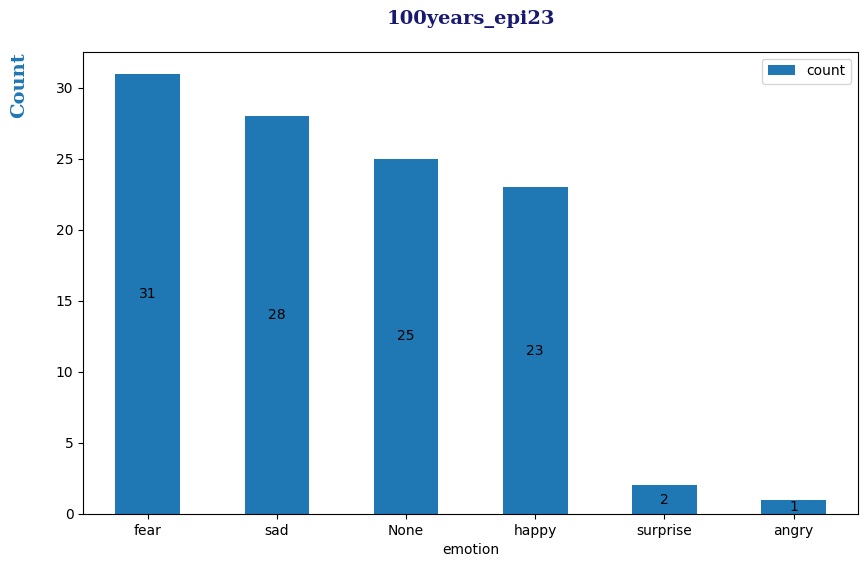

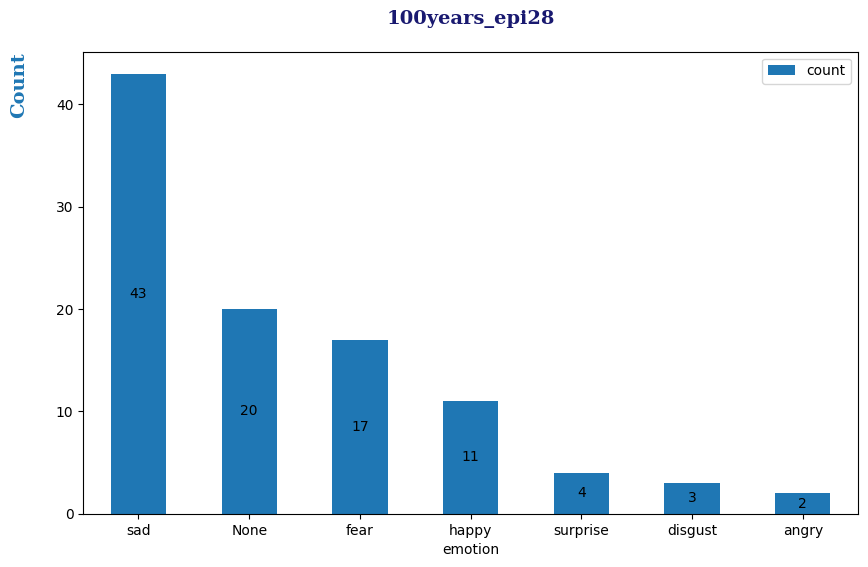

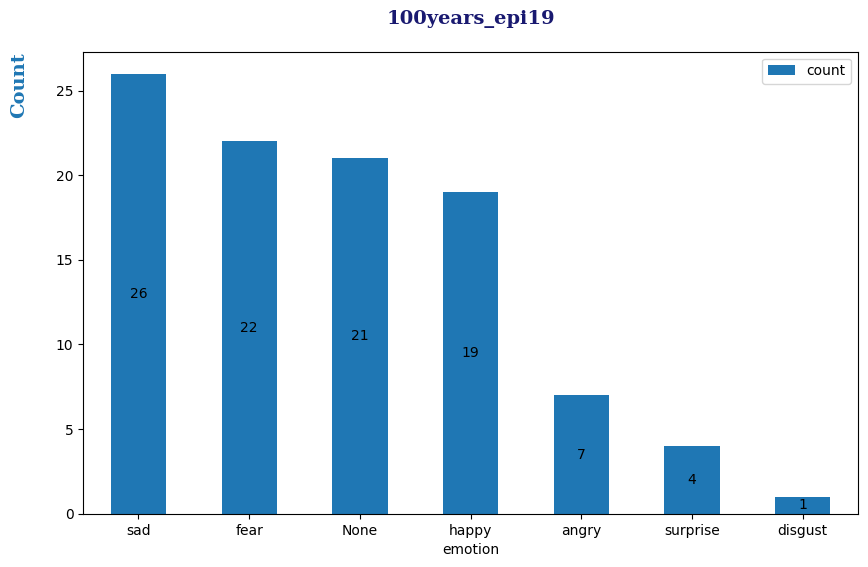

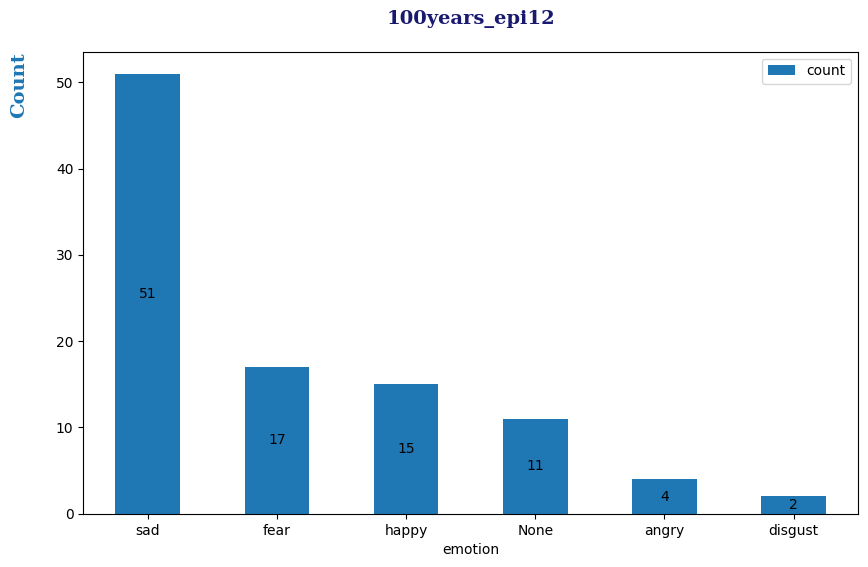

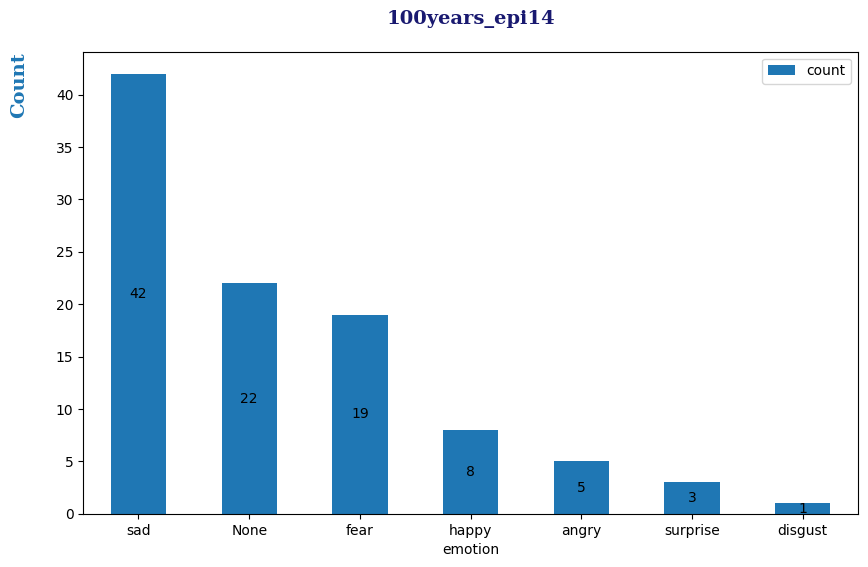

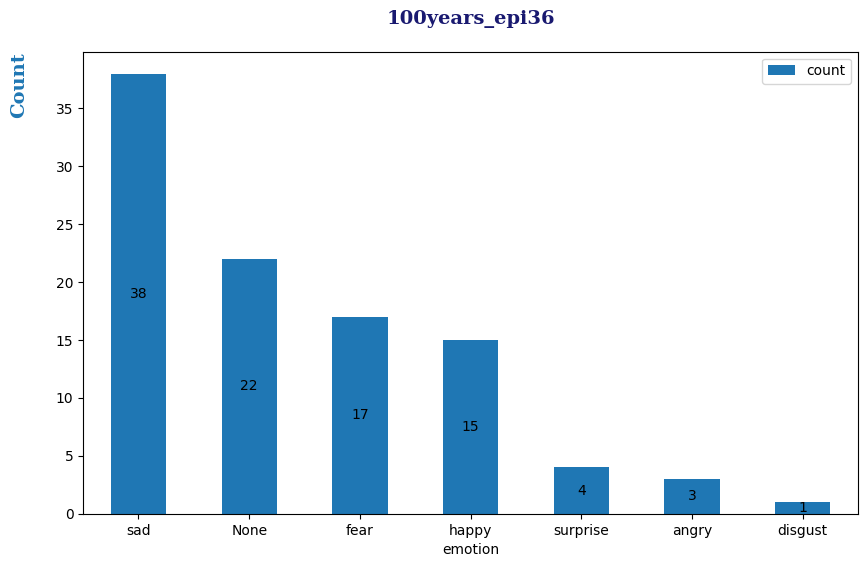

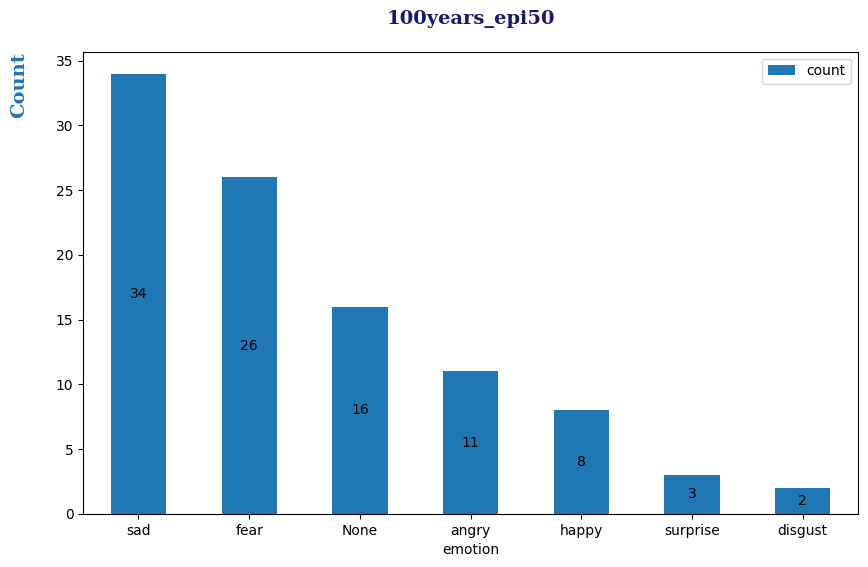

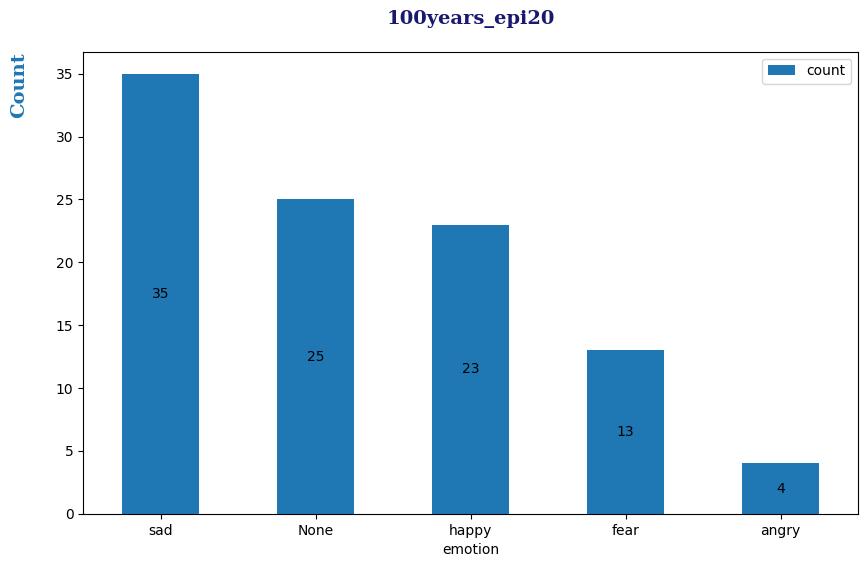

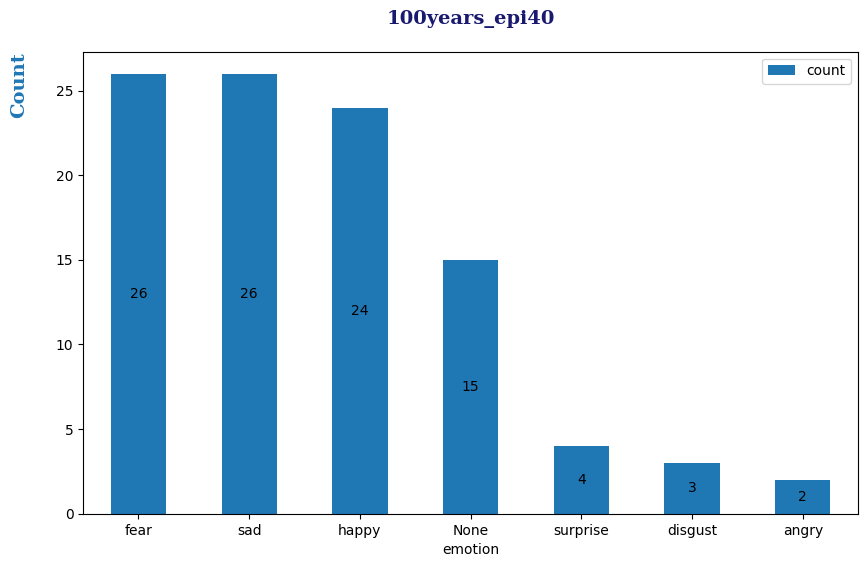

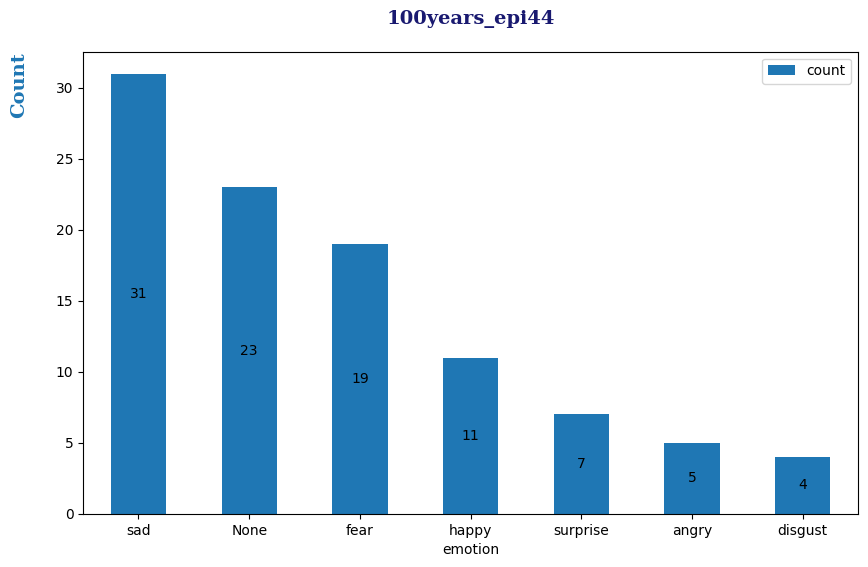

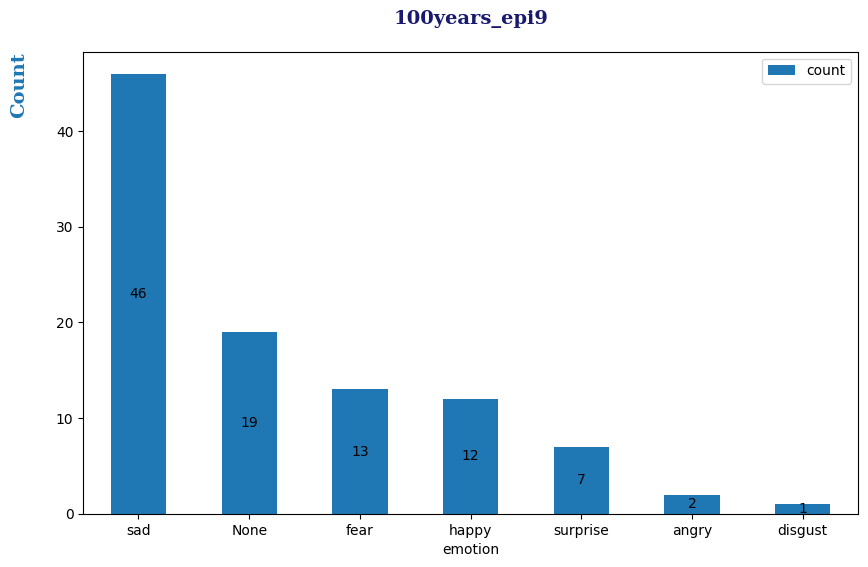

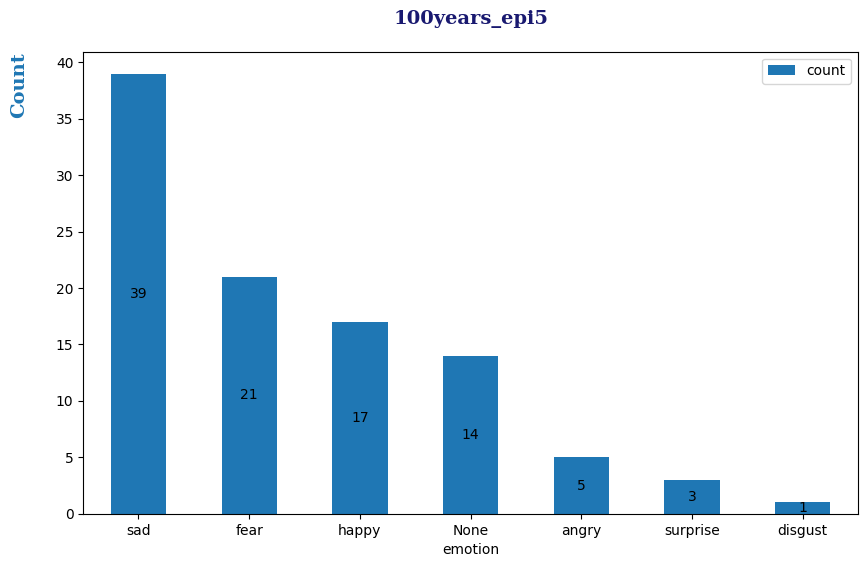

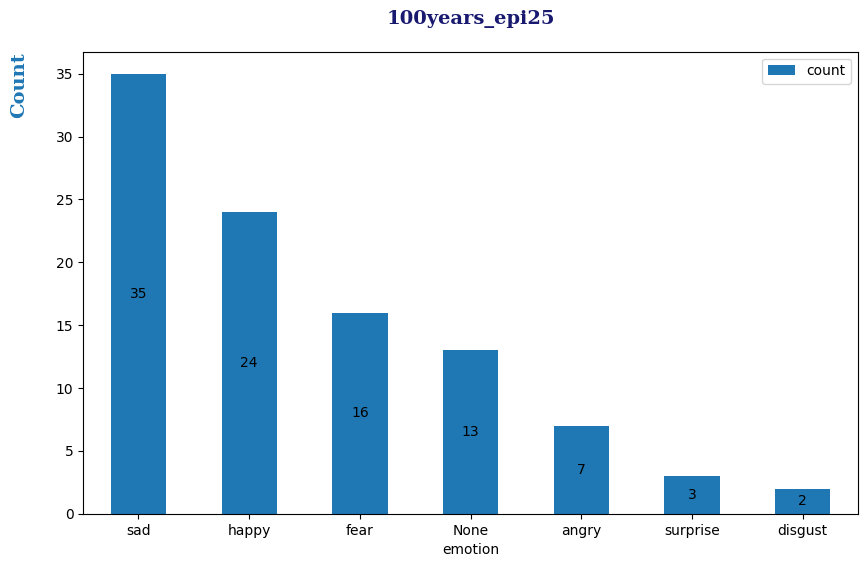

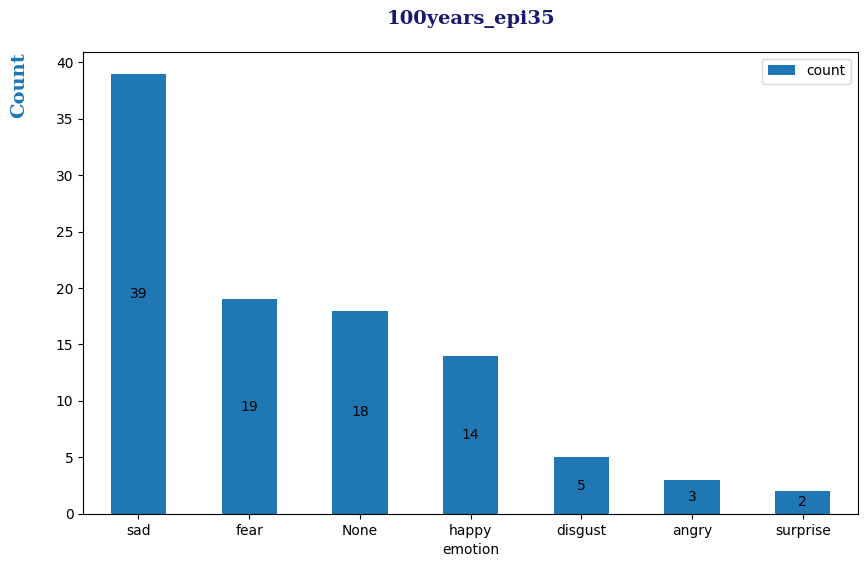

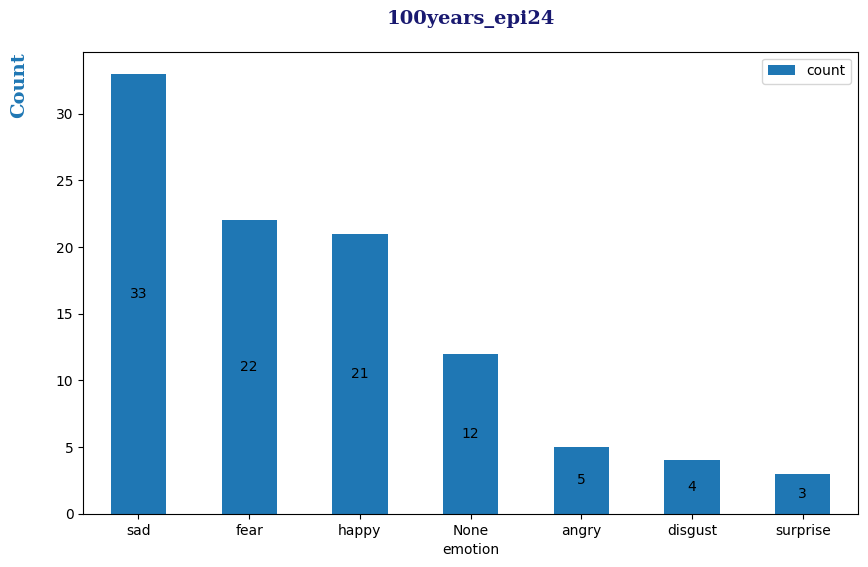

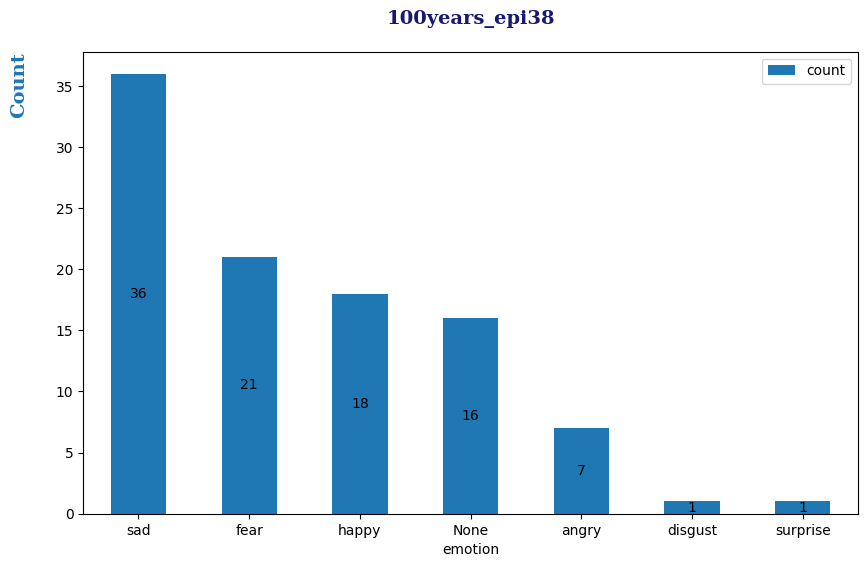

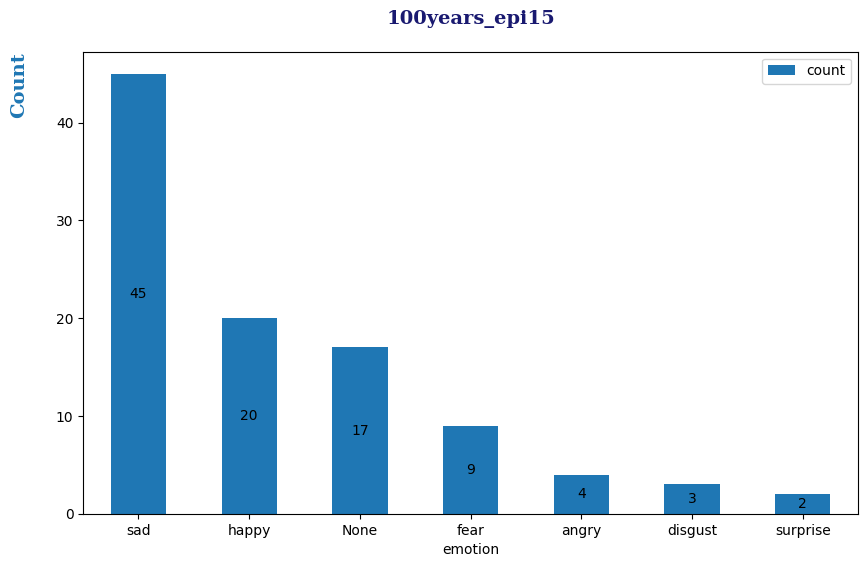

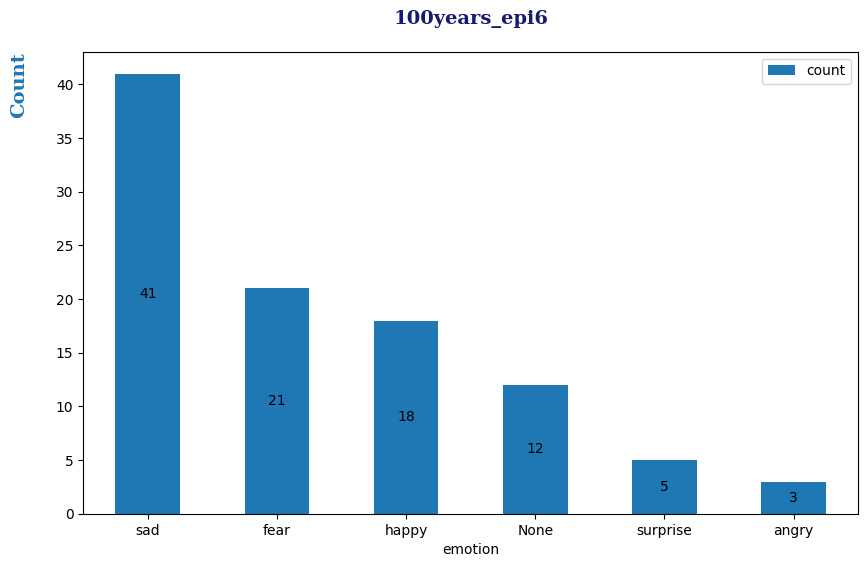

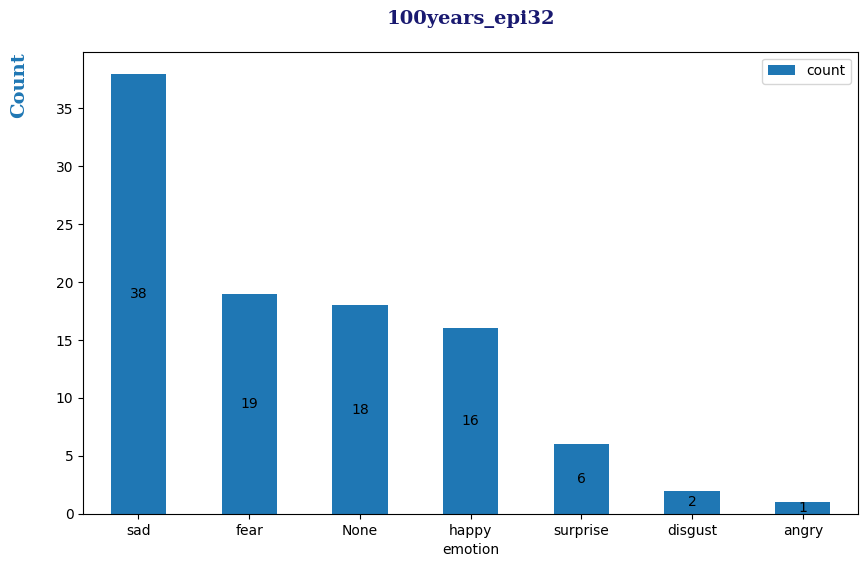

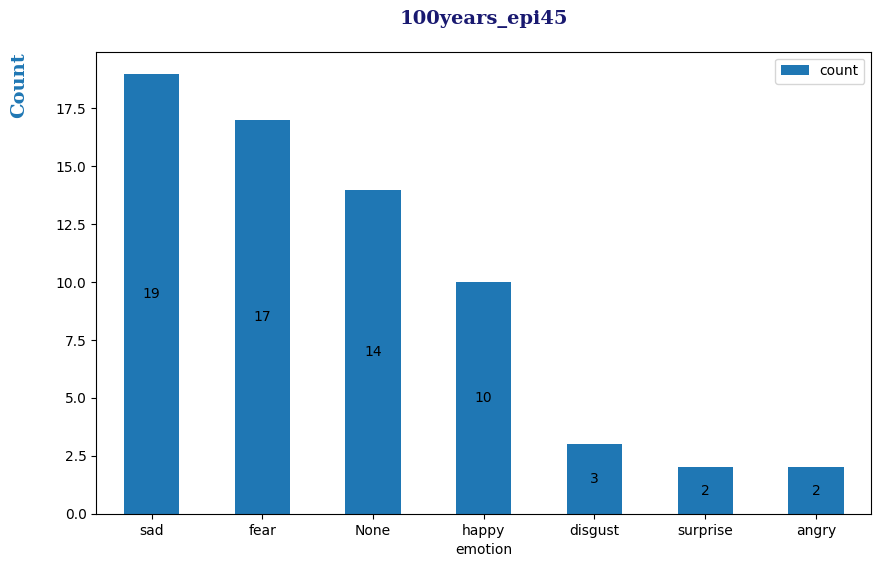

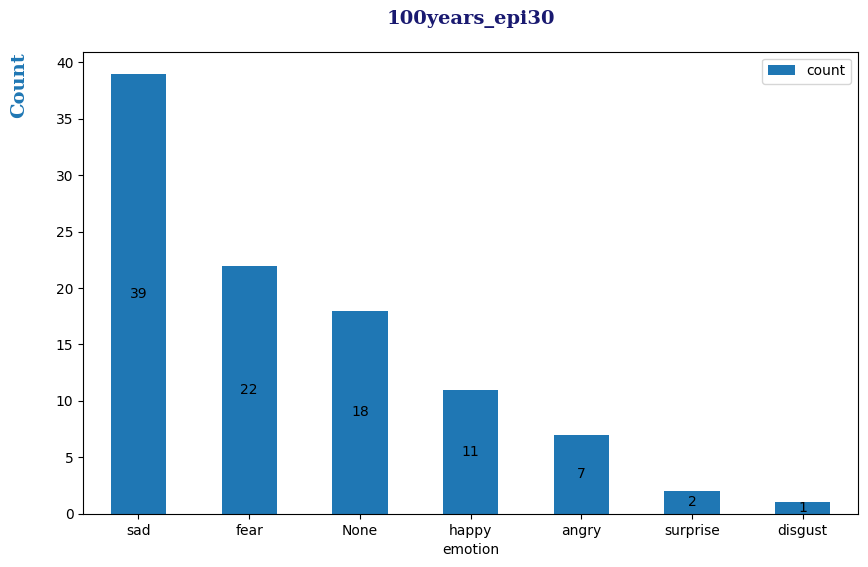

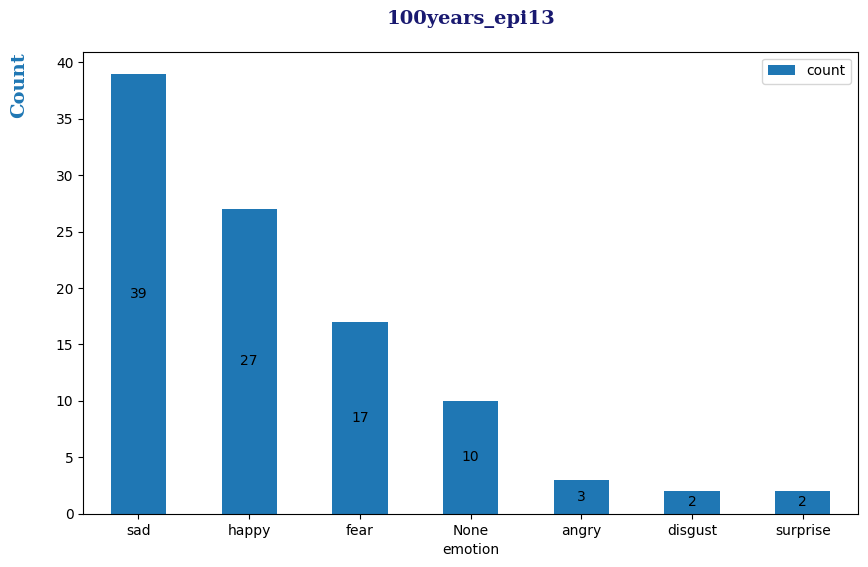

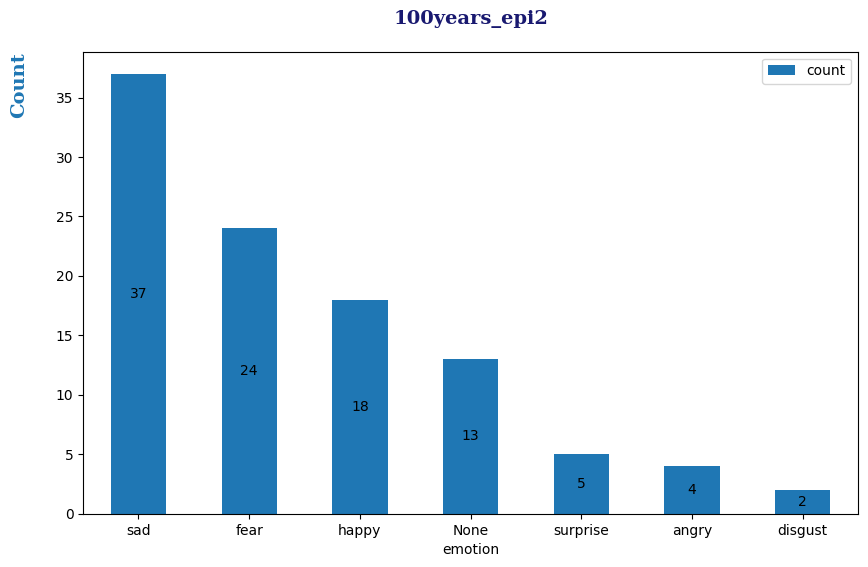

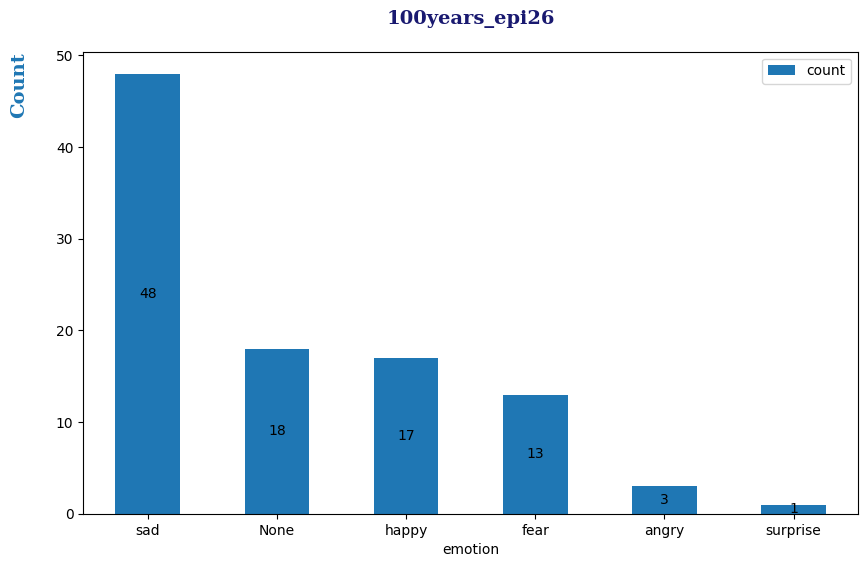

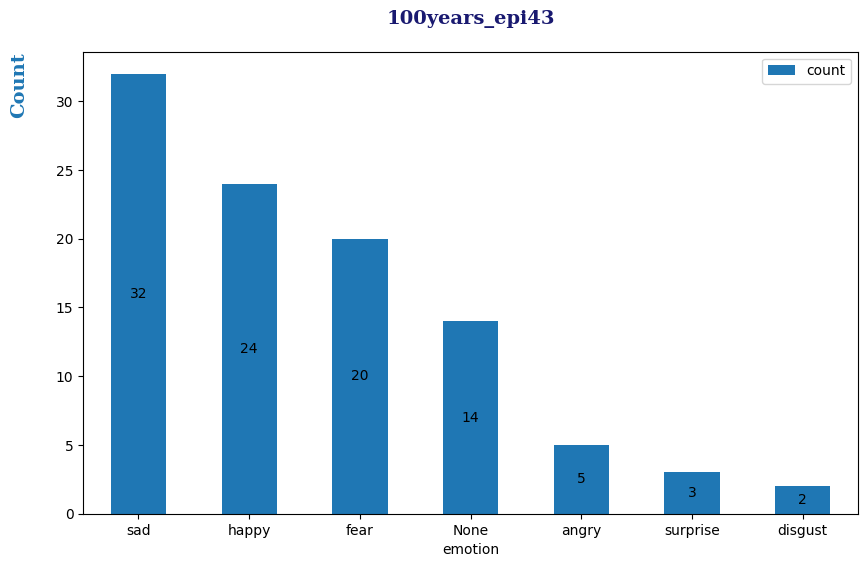

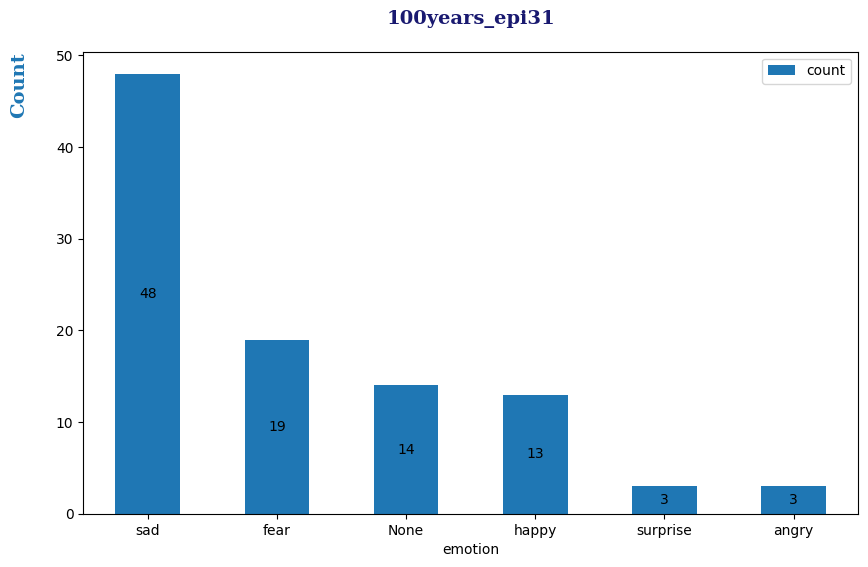

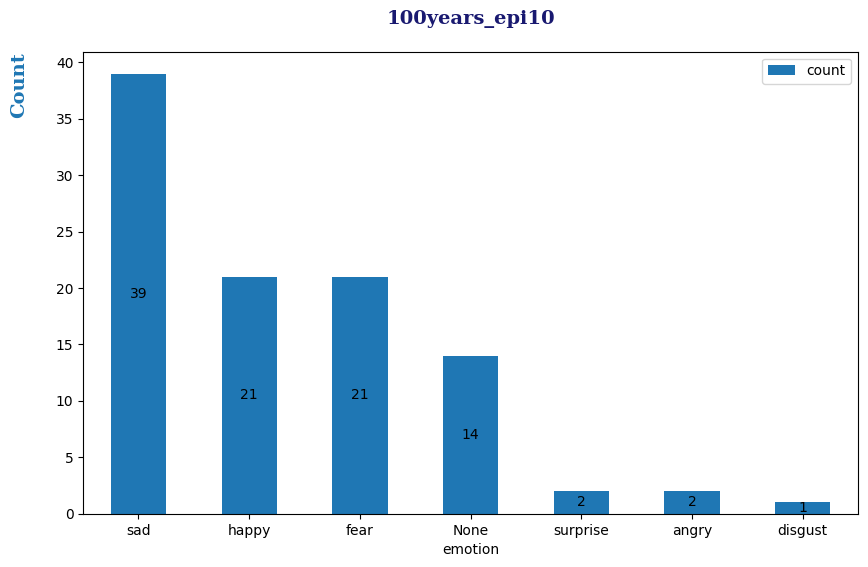

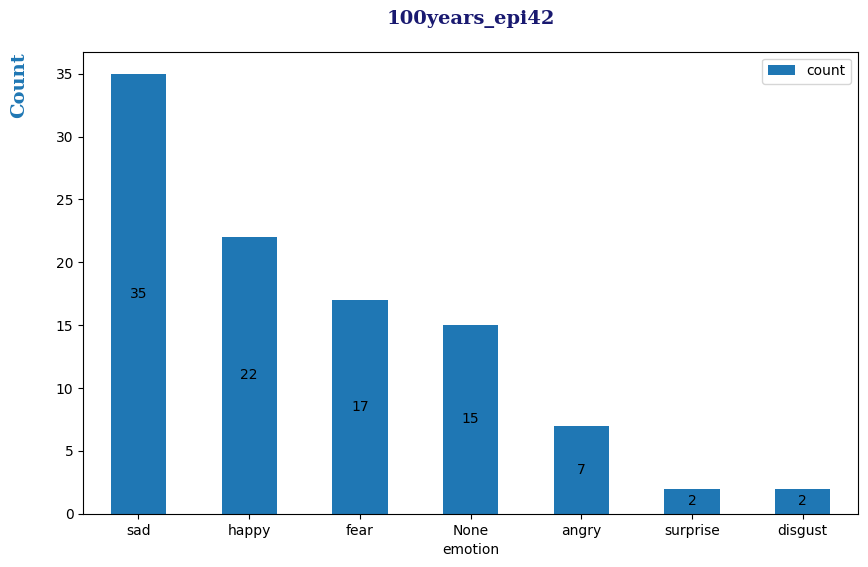

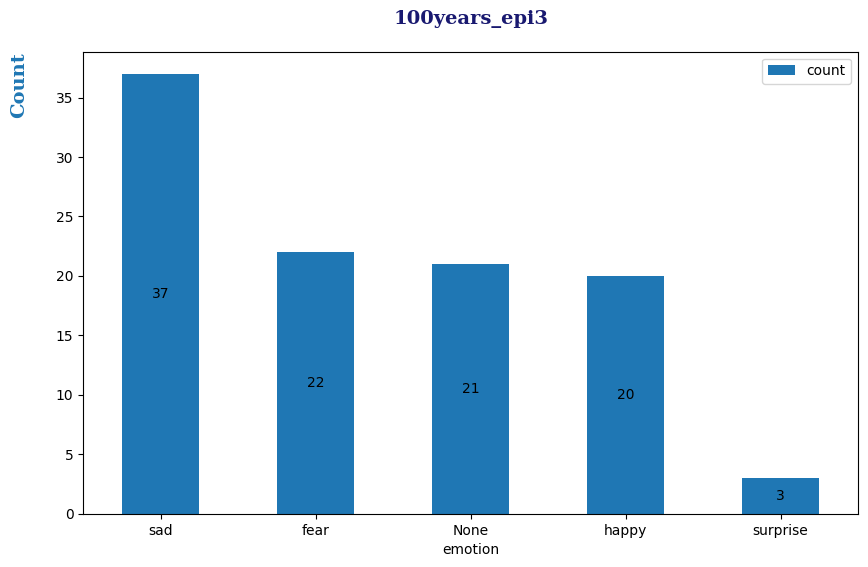

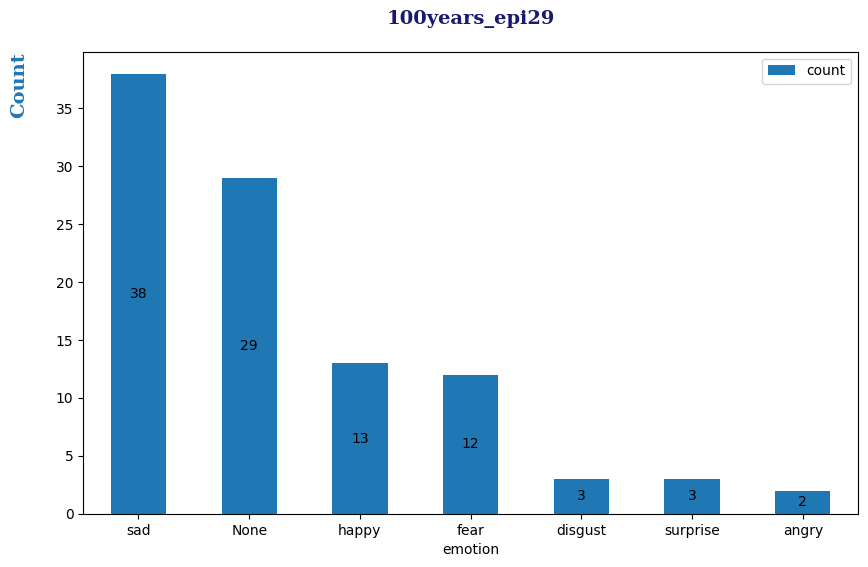

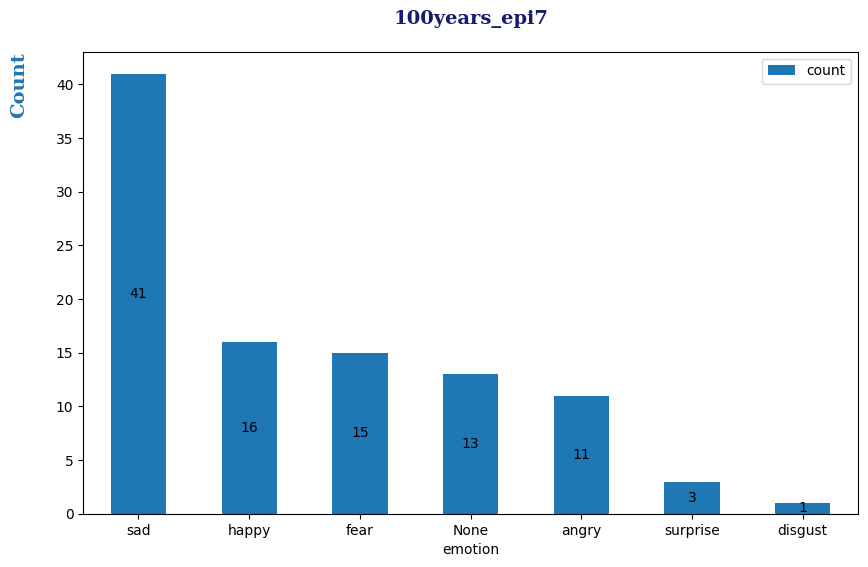

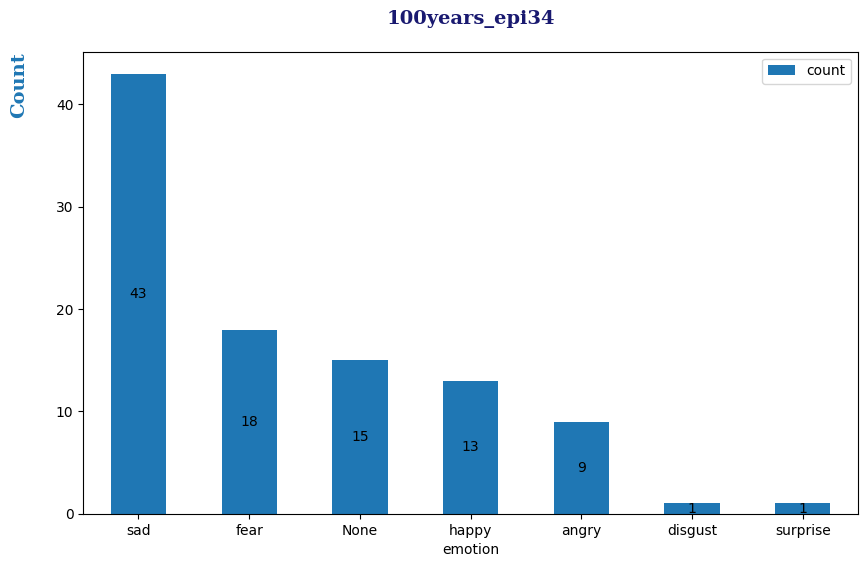

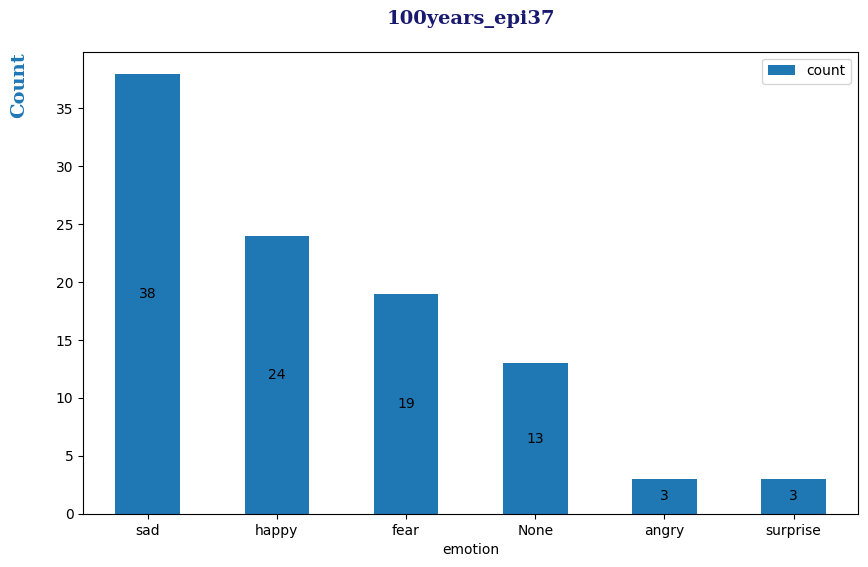

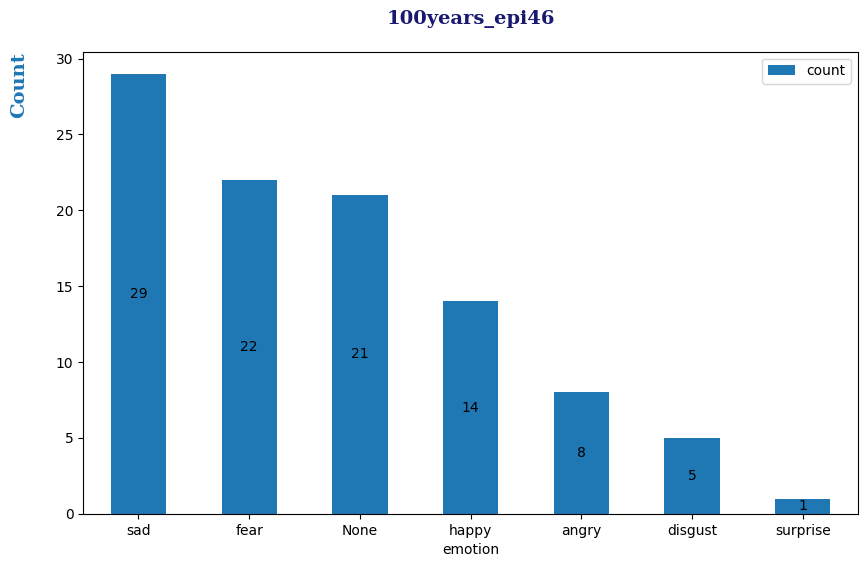

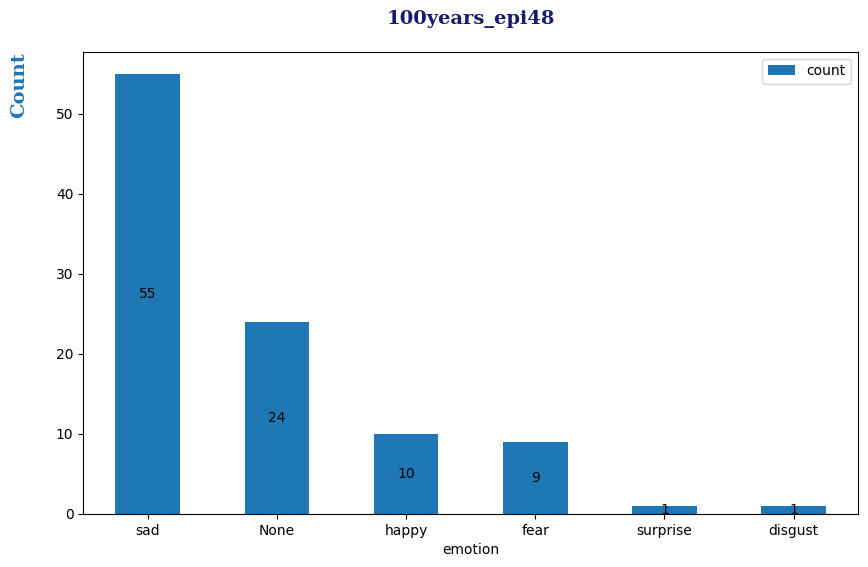

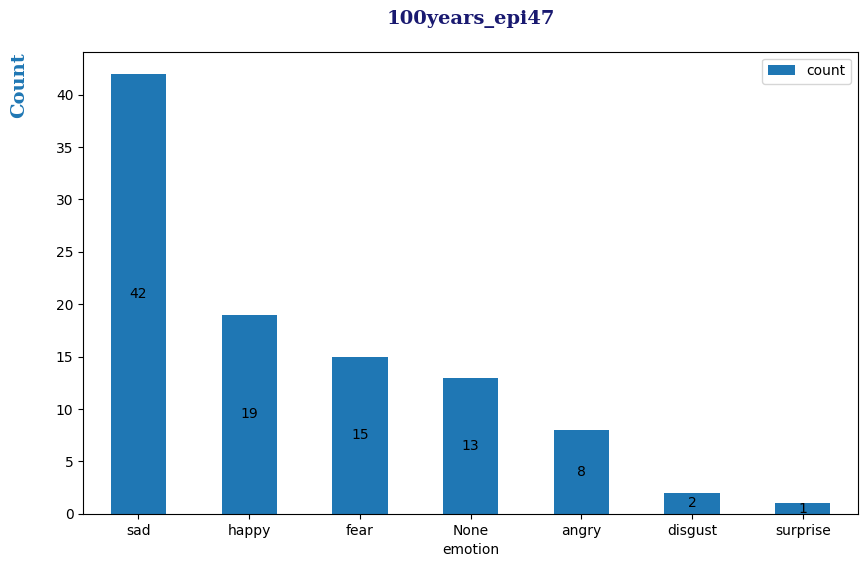

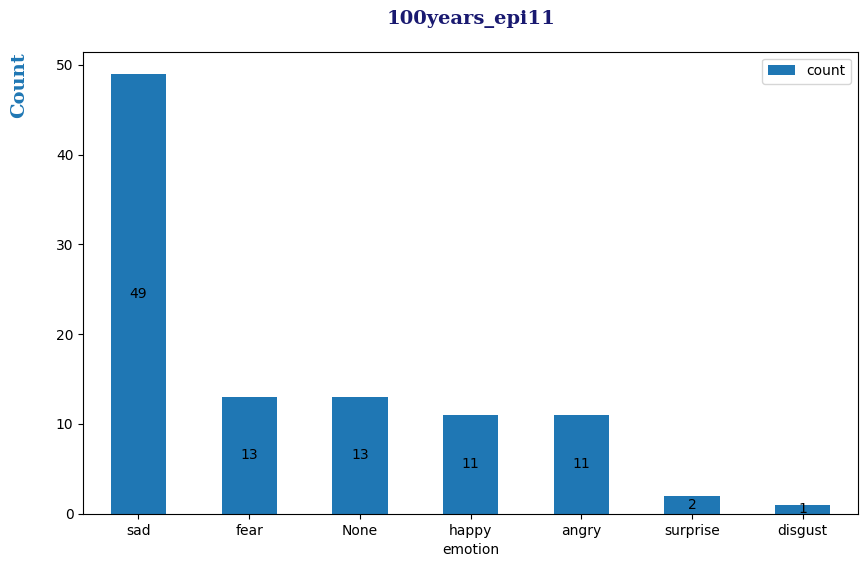

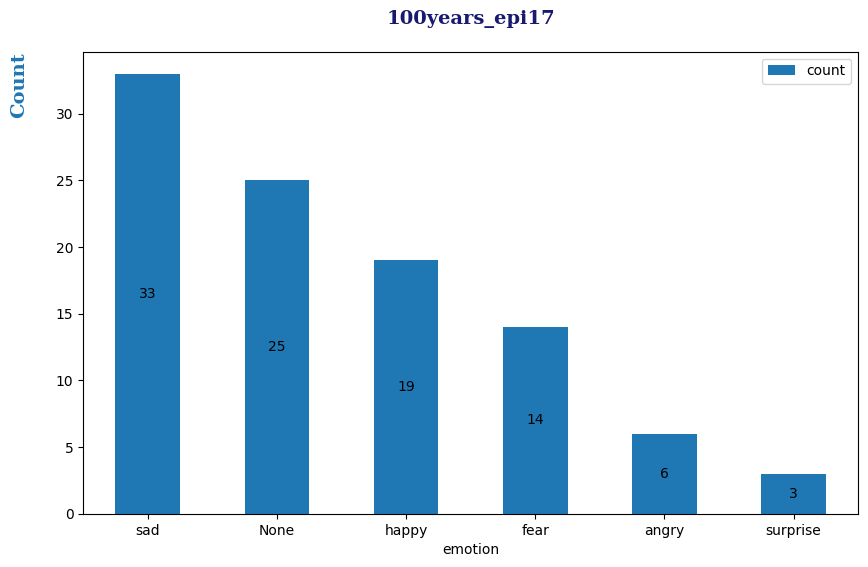

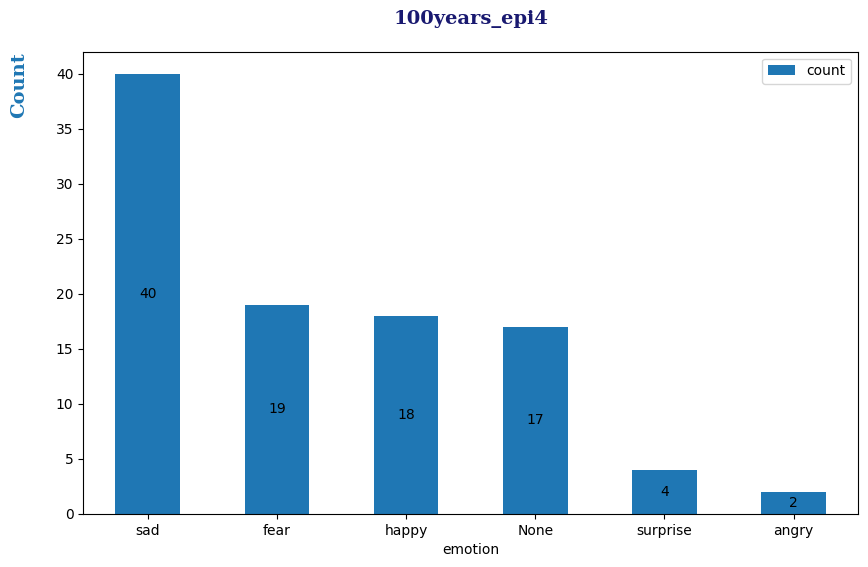

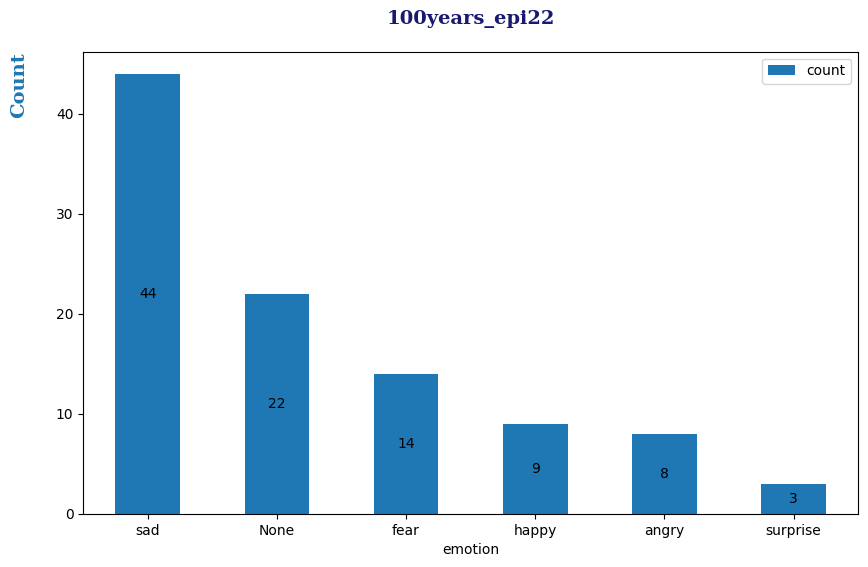

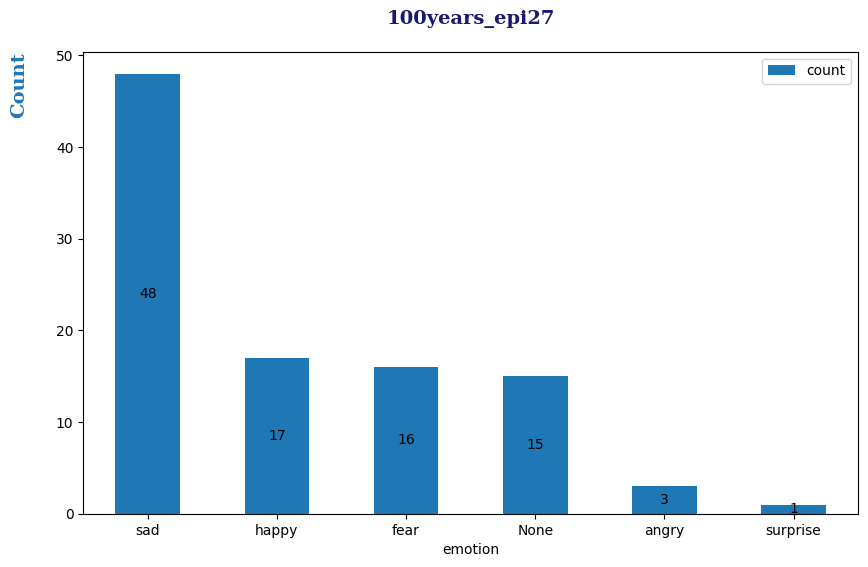

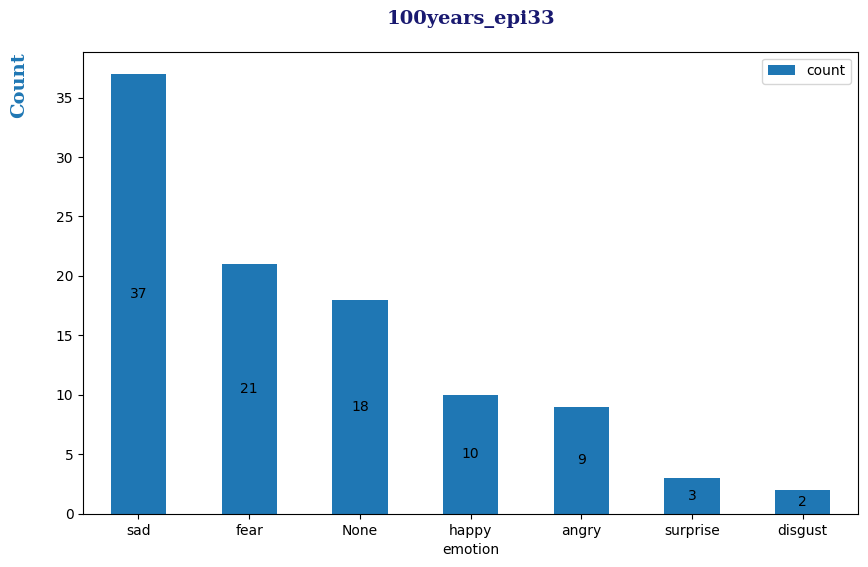

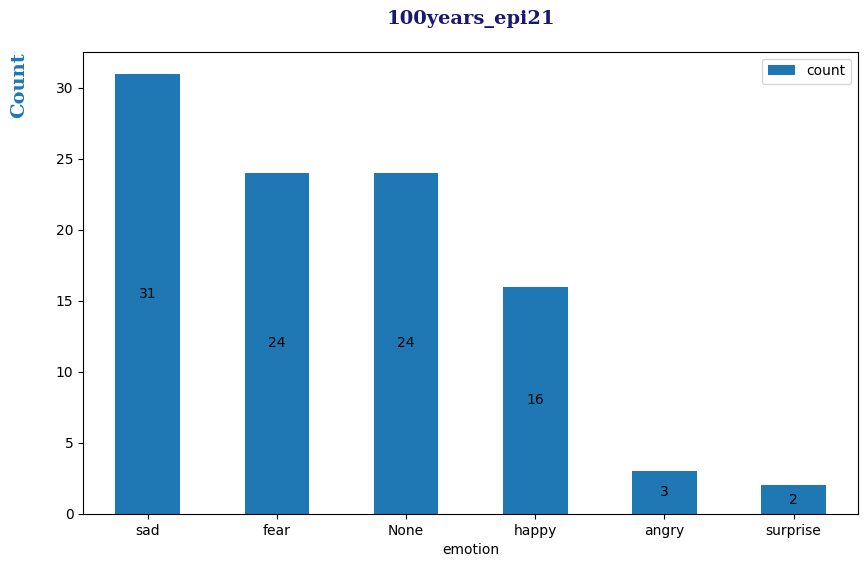

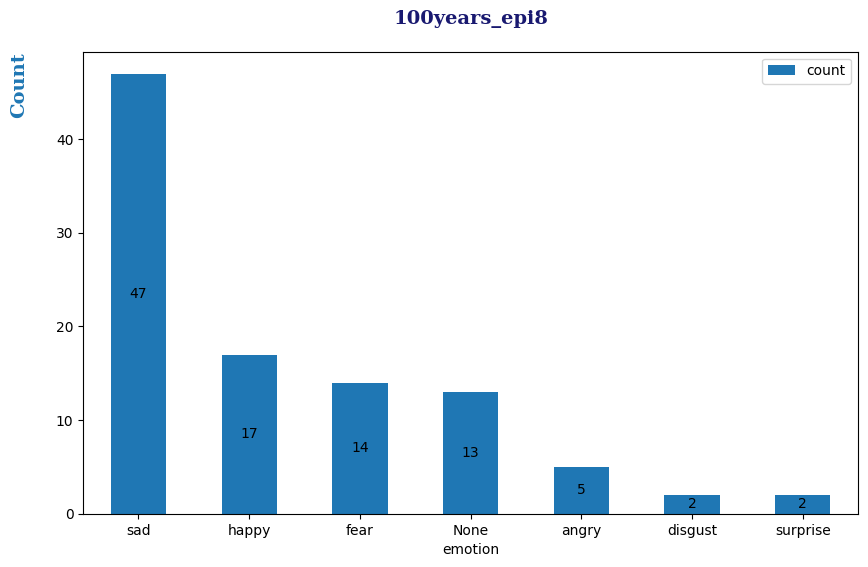

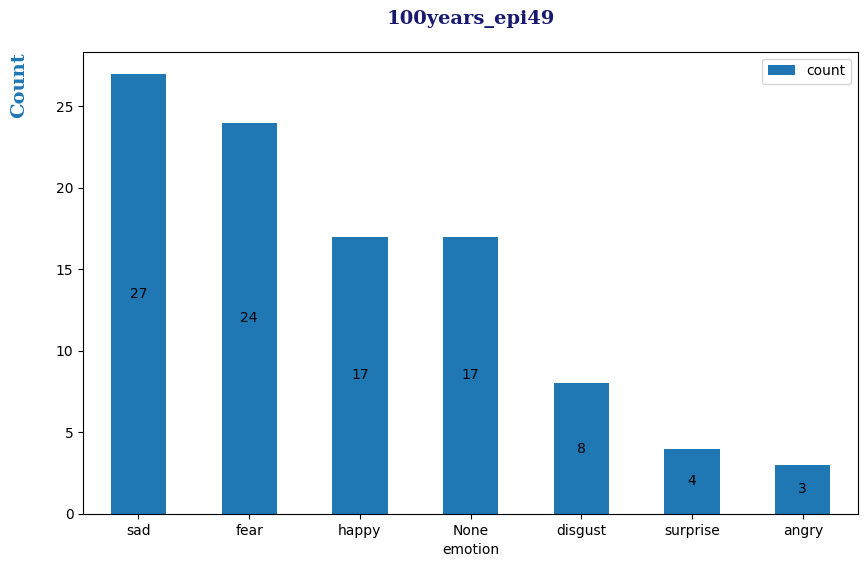

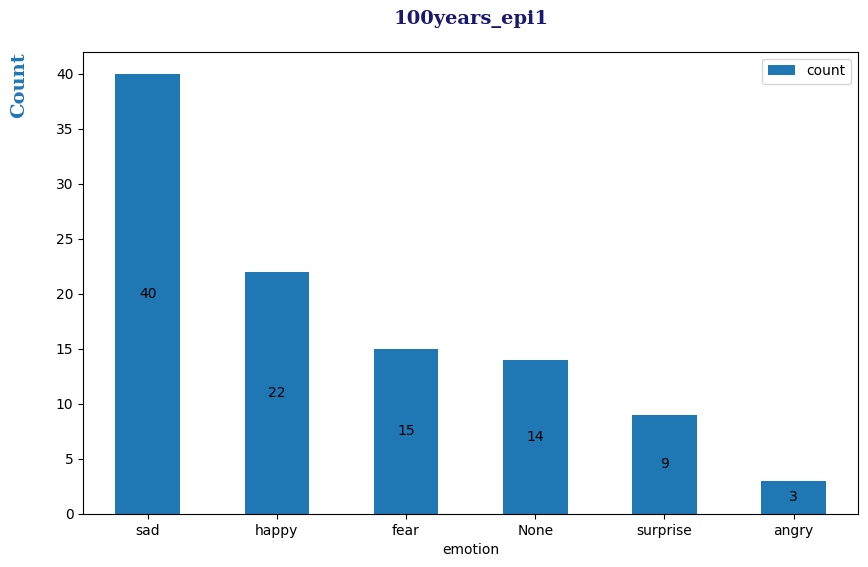

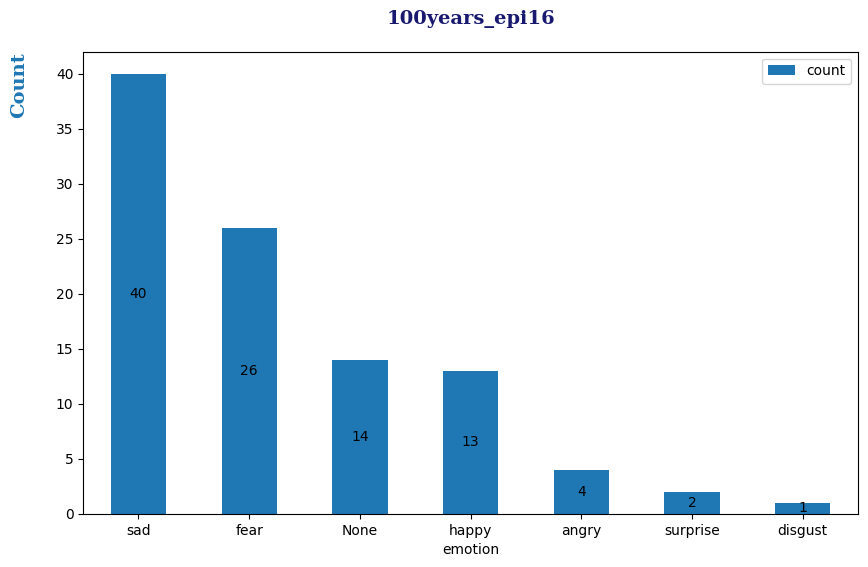

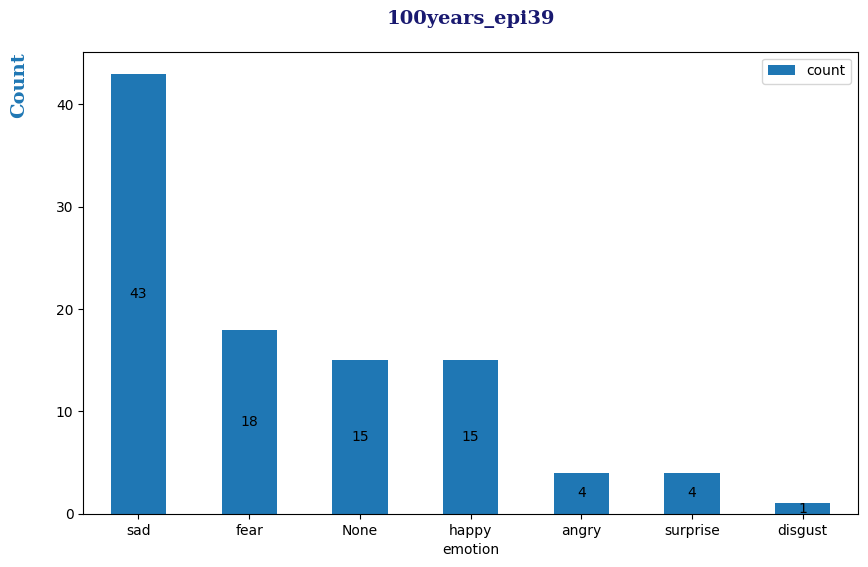

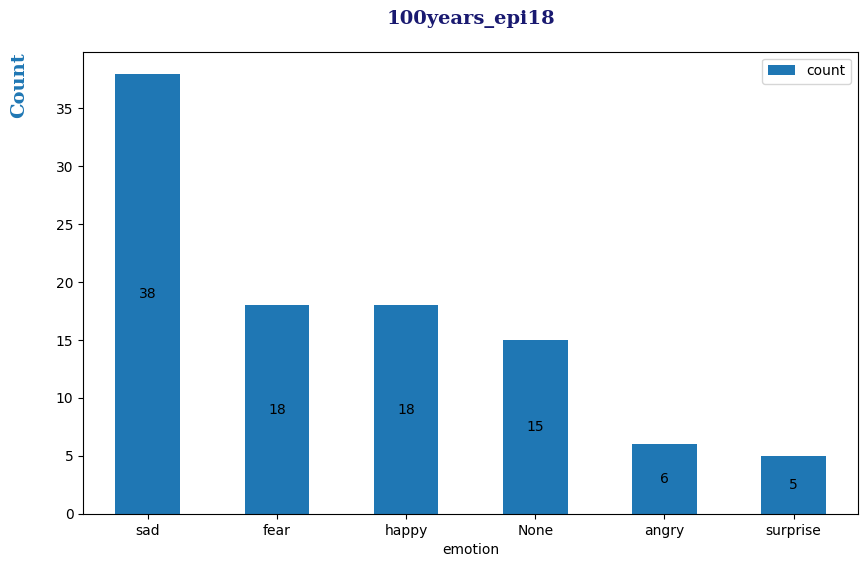

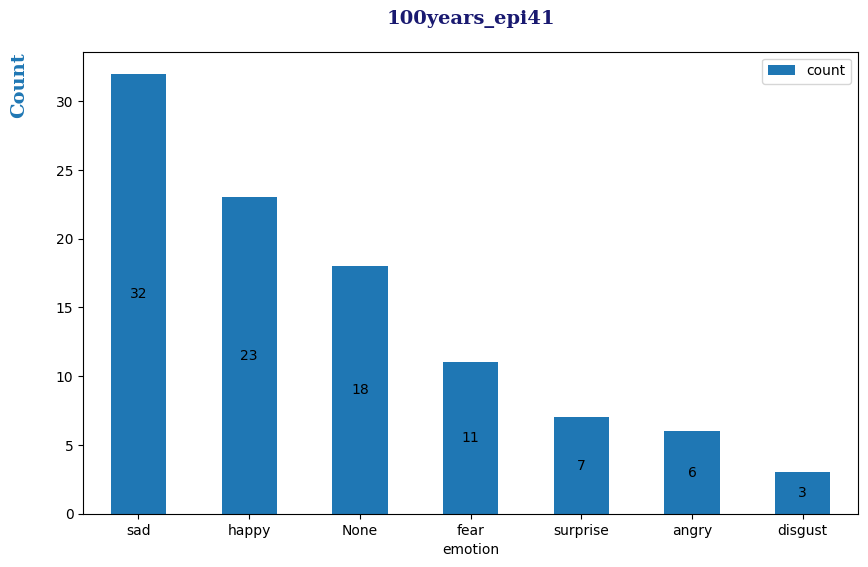

In [8]:
import matplotlib.pyplot as plt
name = '100years'
path = f'./result/{name}_all_df_cnt.csv'
all_df = pd.read_csv(path)

epi_list = list(set(all_df['episode'].to_list()))
for epi in epi_list:
    tmp_df = all_df[all_df['episode'] == epi]


    ax = tmp_df.plot.bar(x='emotion', y='count',  color='#1f77b4',figsize=(10, 6), rot=0)
    plt.ylabel('Count',labelpad=20,loc='top',fontdict={'family': 'serif', 'color': '#1f77b4', 'weight': 'bold', 'size': 14})
    # plt.xlabel('Emotion',labelpad=20,loc='right',fontdict={'family': 'serif', 'color': '#1f77b4', 'weight': 'bold', 'size': 14})
    plt.title(name+'_'+epi,pad=20,fontdict={'family': 'serif', 'color': 'midnightblue', 'weight': 'bold', 'size': 14})

    for p in ax.patches:
        left, bottom, width, height = p.get_bbox().bounds
        ax.annotate(int(height), xy=(left+width/2, bottom+height/2), ha='center', va='center')

    new_path = './result/graph'
    plt.savefig(os.path.join(new_path,name+'_'+epi+'.png'))

In [76]:
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 32.6 MB/s eta 0:00:0000:0100:01
  Using cached tenacity-8.1.0-py3-none-any.whl (23 kB)


In [4]:
import plotly.express as px
import pandas as pd



# Create a scatter plot
fig = px.bar(tmp_df, x='emotion', y='count')

fig.ylabel('Count',labelpad=20,loc='top',fontdict={'family': 'serif', 'color': '#1f77b4', 'weight': 'bold', 'size': 14})
fig.xlabel('Emotion',labelpad=20,loc='right',fontdict={'family': 'serif', 'color': '#1f77b4', 'weight': 'bold', 'size': 14})
# Show the plot
fig.show()


AttributeError: 'Figure' object has no attribute 'ylabel'

In [11]:
!conda install -c conda-forge python-kaleido
y

Retrieving notices: ...working... done
Solving environment: done

## Package Plan ##

  environment location: /Users/seongrok.kim/miniforge3

  added / updated specs:
    - python-kaleido


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    kaleido-core-0.2.1         |       h27ca646_0        73.4 MB  conda-forge
    mathjax-2.7.7              |       hce30654_3        21.2 MB  conda-forge
    python-kaleido-0.2.1       |     pyhd8ed1ab_0          18 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        94.6 MB

The following NEW packages will be INSTALLED:

  kaleido-core       conda-forge/osx-arm64::kaleido-core-0.2.1-h27ca646_0 
  mathjax            conda-forge/osx-arm64::mathjax-2.7.7-hce30654_3 
  python-kaleido     conda-forge/noarch::python-kaleido-0.2.1-pyhd8ed1ab_0 


Proceed ([y]/n)? ^C

CondaSyste

In [12]:
import plotly.graph_objects as go
import pandas as pd



# Create a bar chart
fig = go.Figure(data=[go.Bar(x=tmp_df['emotion'], y=tmp_df['count'],text = tmp_df['count'],textposition = 'outside', cliponaxis=False)])
fig.update_layout(
    title=name+'_'+epi_list[0],
    yaxis_title="Count",
    legend_title="Legend Title",
    font=dict(
        family="Courier New, monospace",
        size=18,
        # color="RebeccaPurple"
    )
)
# Show the plot
fig.show()
fig.write_image("./result/graph/test.png")

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido
